## Import modules

In [1]:
from __future__ import division

import os; os.chdir(os.path.join('..', '..'))
print os.getcwd()

/Users/eharkin/Documents/School/Grad work/Thesis/Experiments/GIF fitting/GIF fitting project/GIFFittingToolbox


In [2]:
import pickle

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import pandas as pd

%config InlineBackend.figure_format ='retina'

## Load data

In [3]:
DATA_PATH = os.path.join('data', 'simulations', 'GIF_network')

with open(os.path.join(DATA_PATH, 'median_gifs.dat'), 'rb') as f:
    medgifs = pickle.load(f)
    f.close()
    
with open(os.path.join(DATA_PATH, 'sergif_manual.dat'), 'rb') as f:
    sergifman = pickle.load(f)
    f.close()

In [4]:
medgifs.head()

,Scale,Inhibition,Input,ser spks,ser ex,gaba ex
0,0.010000,ib,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{u'v_T': [-52.383328508571815, -52.38332850857...","{u'v_T': [-61.533701879440926, -61.53370187944..."
1,0.010000,reg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{u'v_T': [-52.383328508571815, -52.38332850857...","{u'v_T': [-61.533701879440926, -61.53370187944..."
2,0.023571,ib,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{u'v_T': [-52.383328508571815, -52.38332850857...","{u'v_T': [-61.533701879440926, -61.53370187944..."
3,0.023571,reg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{u'v_T': [-52.383328508571815, -52.38332850857...","{u'v_T': [-61.533701879440926, -61.53370187944..."
4,0.037143,ib,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{u'v_T': [-52.383328508571815, -52.38332850857...","{u'v_T': [-61.533701879440926, -61.53370187944..."


In [5]:
def closest(x, val):
    return np.isclose(x, x[np.argmin(np.abs(x - val))])

/Users/eharkin/miniconda3/envs/pozz/lib/python2.7/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


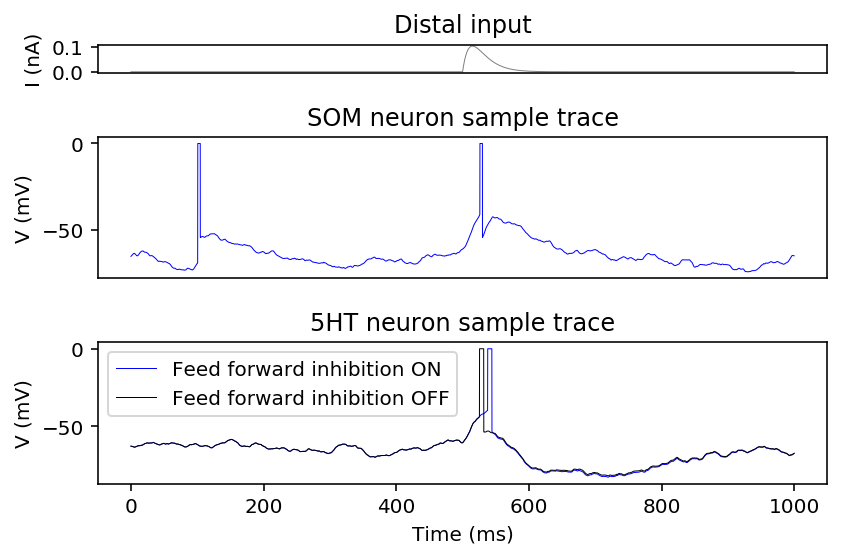

In [7]:
gifnet_df = sergifman
sample_scale = 0.15

plt.figure()

sample_tr_spec = gs.GridSpec(3, 1, height_ratios = [0.2, 1, 1])

plt.subplot(sample_tr_spec[0, :])
plt.title('Distal input')
plt.plot(
    gifnet_df.loc[
        np.logical_and(closest(gifnet_df['Scale'], 0.1), gifnet_df['Inhibition'] == 'reg'), 'ser ex'
    ].values[0]['t'],
    gifnet_df.loc[
        np.logical_and(closest(gifnet_df['Scale'], 0.1), gifnet_df['Inhibition'] == 'reg'), 'Input'
    ].values[0], 
    '-', color = 'gray', lw = 0.5
)
plt.xticks([])
plt.ylabel('I (nA)')

plt.subplot(sample_tr_spec[1, :])
plt.title('SOM neuron sample trace')
plt.plot(
    gifnet_df.loc[
        np.logical_and(closest(gifnet_df['Scale'], 0.1), gifnet_df['Inhibition'] == 'reg'), 'gaba ex'
    ].values[0]['t'],
    gifnet_df.loc[
        np.logical_and(closest(gifnet_df['Scale'], 0.1), gifnet_df['Inhibition'] == 'reg'), 'gaba ex'
    ].values[0]['V'], 
    'b-', lw = 0.5
)
plt.xticks([])
plt.ylabel('V (mV)')

plt.subplot(sample_tr_spec[2, :])
plt.title('5HT neuron sample trace')
plt.plot(
    gifnet_df.loc[
        np.logical_and(closest(gifnet_df['Scale'], 0.1), gifnet_df['Inhibition'] == 'reg'), 'ser ex'
    ].values[0]['t'],
    gifnet_df.loc[
        np.logical_and(closest(gifnet_df['Scale'], 0.1), gifnet_df['Inhibition'] == 'reg'), 'ser ex'
    ].values[0]['V'], 
    'b-', lw = 0.5,
    label = 'Feed forward inhibition ON'
)
plt.plot(
    gifnet_df.loc[
        np.logical_and(closest(gifnet_df['Scale'], 0.1), gifnet_df['Inhibition'] == 'ib'), 'ser ex'
    ].values[0]['t'],
    gifnet_df.loc[
        np.logical_and(closest(gifnet_df['Scale'], 0.1), gifnet_df['Inhibition'] == 'ib'), 'ser ex'
    ].values[0]['V'], 
    'k-', lw = 0.5,
    label = 'Feed forward inhibition OFF'
)
plt.xlabel('Time (ms)')
plt.ylabel('V (mV)')

plt.legend()

plt.tight_layout()

plt.show()